In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score ,recall_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, Trials


In [2]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [3]:
PassenegerID = test['PassengerId']

In [4]:
# 남자 0 , 여자 1
sex_mapping = {'male':0,'female':1}
sex_mapping

{'male': 0, 'female': 1}

In [5]:
del train['PassengerId']
del test['PassengerId']

In [6]:
train_test_data=[train,test]

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [7]:
# 이름 추출
# train['Cabin']=train['Cabin'].str[:1]
# test['Cabin']=test['Cabin'].str[:1]
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [8]:
# Pclass 정규화
pclass_mapping={1:0,2:1,3:2}
pclass_mapping

{1: 0, 2: 1, 3: 2}

In [9]:
for dataset in train_test_data:
    dataset['Pclass']=dataset['Pclass'].map(pclass_mapping)
    

In [10]:
# 1등급 =0 ,2등급=1, 3등급=2
train['Pclass'].value_counts()

Pclass
2    491
0    216
1    184
Name: count, dtype: int64

In [11]:
# Embarked NaN 채우기
train['Embarked']=train['Embarked'].fillna('S')

In [12]:
fare_mean=test[test['Pclass']==1]['Fare'].mean()
fare_mean

22.20210430107527

In [13]:
test.loc[test['Fare'].isnull(),'Fare']=fare_mean

In [14]:
embarked_mapping={
    'S':0
    ,'Q':1
    ,'C':2
}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [15]:
train['Title']=train['Name'].str.extract('([A-Za-z]+\.)',expand=False)

In [16]:
test['Title']=test['Name'].str.extract('([A-Za-z]+\.)',expand=False)

In [17]:
# # for dataset in train_test_data:
#     # dataset['Ticket_q'] = dataset['Ticket'].str.extract('(0-9]+) ', expand=False)
# for dataset in train_test_data:
#     dataset['Ticket_q'] = dataset['Ticket'].str.extract('([0-9].+) ', expand=False)

In [18]:
del train['Ticket']
del test['Ticket']

In [19]:
del test['Name'] 
del train['Name'] 

In [20]:
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('mean')
    ,inplace=True
    )


In [21]:
train_name_mapping={
    'Mr.':0, 'Miss.':1, 'Mrs.':2, 'Master.':3,'Dr.':3, 'Rev.':3, 'Mlle.':3, 'Major.':3,
    'Col.':3, 'Countess.':3, 'Capt.':3, 'Ms.':3, 'Sir.':3, 'Lady.':3, 'Mme.':3, 'Don.':3,
    'Jonkheer.':3
}
test_name_mapping={
    'Mr.':0, 'Miss.':1, 'Mrs.':2, 'Master.':3
    , 'Col.':3, 'Rev.':3, 'Ms.':3, 'Dr.':3,
    'Dona.':3
}

In [22]:
train['Title']=train['Title'].map(train_name_mapping)
test['Title']=test['Title'].map(test_name_mapping)

In [23]:
for dataset in train_test_data:
    dataset.loc[(dataset['Title']==0)&(dataset['Age']<=19),'Title']=4

In [24]:
train['Title'].value_counts()

Title
0    464
1    182
2    125
3     67
4     53
Name: count, dtype: int64

In [25]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare']<=7.91),'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.45),'Fare']=1
    dataset.loc[(dataset['Fare']>14.45)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[(dataset['Fare']>31),'Fare']=3
    

In [26]:
train['Fare'].value_counts()

Fare
2.0    229
0.0    223
3.0    222
1.0    217
Name: count, dtype: int64

In [27]:
# train['Ticket_q'].value_counts()

In [28]:
for dataset in train_test_data:    
    #이산적 변수들
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['FamilyD']=0
    dataset.loc[(dataset['FamilySize']>1),'FamilyD']=1
    dataset.loc[(dataset['FamilySize']>=4),'FamilyD']=2
    dataset.loc[(dataset['Sex']==1)&(dataset['FamilyD']==0),'FamilyD']=3

In [29]:
for dataset in train_test_data:
    dataset['Father']=0
    dataset['Mother']=0
    dataset.loc[(dataset['Age']>=30)&(dataset['Age']<=50)&(dataset['Title']==0)&(dataset['Sex']==0),'Father']=1
    dataset.loc[(dataset['Age']>=30)&(dataset['Age']<=50)&(dataset['Title']==2)&(dataset['Sex']==1),'Mother']=1

In [30]:
for dataset in train_test_data:
    dataset['noParch']=0
    dataset['noSibSp']=0
    dataset.loc[(dataset['Parch']==0)&(dataset['SibSp']>0),'noParch']=1
    dataset.loc[(dataset['SibSp']==0)&(dataset['Parch']>0),'noSibSp']=1

In [31]:
train['Father'].value_counts()

Father
0    611
1    280
Name: count, dtype: int64

In [32]:
train['noParch'].value_counts()

noParch
0    750
1    141
Name: count, dtype: int64

In [33]:
train['noSibSp'].value_counts()

noSibSp
0    820
1     71
Name: count, dtype: int64

In [34]:
train['FamilyD'].value_counts()

FamilyD
0    411
1    263
3    126
2     91
Name: count, dtype: int64

In [35]:
train['Age'].value_counts()

Age
32.368090    119
21.773973     36
24.000000     30
22.000000     27
18.000000     26
            ... 
14.500000      1
70.500000      1
12.000000      1
36.500000      1
74.000000      1
Name: count, Length: 92, dtype: int64

In [36]:
train.groupby(['Sex'])['Age'].mean()

Sex
0    30.903413
1    27.643731
Name: Age, dtype: float64

In [37]:
for dataset in train_test_data:
    
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=36),'Age']=2
    dataset.loc[dataset['Age']>36,'Age']=3

In [38]:
train['Cabin'].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [39]:
test.loc[(test['Age'].isna()),'Age']=test.loc[(test['Pclass']==2)&(test['Sex']==1)]['Age'].mean()

<Axes: xlabel='Age', ylabel='Survived'>

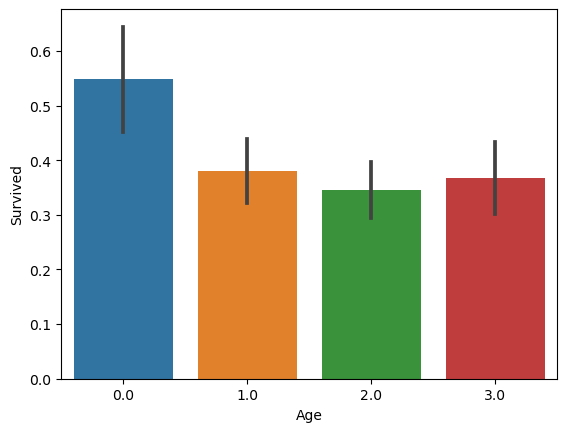

In [40]:
sns.barplot(x=train['Age'],y=train['Survived'])

In [41]:
f_mapping={1:1,2:2,3:3,4:4,5:5,6:5,7:5,8:5,9:5,10:5,11:5}

In [42]:
for dataset in train_test_data:
    dataset['FamilySize']=dataset['FamilySize'].map(f_mapping)

In [43]:
del train['SibSp']
del train['Parch']
del test['SibSp']
del test['Parch']

In [44]:
cabin_mapping={
    'A':1
    ,'B':1
    ,'C':2
    ,'D':3
    ,'E':4
    ,'F':5
    ,'G':5
    ,'T':5
}

In [45]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)
    

In [46]:

for dataset in train_test_data:
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'),inplace=True)


In [47]:
del train['FamilySize']
del test['FamilySize']

In [48]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyD,Father,Mother,noParch,noSibSp
Survived,1.000000,-0.338481,0.543351,-0.089666,0.295875,-0.288457,0.167675,0.237210,0.416128,-0.300644,0.242810,0.100405,0.168288
Pclass,-0.338481,1.000000,-0.131900,-0.316689,-0.628459,0.880494,-0.162098,-0.048125,-0.083659,0.056653,-0.107143,-0.149112,-0.113647
Sex,0.543351,-0.131900,1.000000,-0.129753,0.248940,-0.108422,0.108262,0.298276,0.727004,-0.499385,0.410969,0.117860,0.199349
Age,-0.089666,-0.316689,-0.129753,1.000000,0.053269,-0.264387,0.004168,-0.332893,-0.210006,0.408784,0.242903,0.079354,-0.056110
Fare,0.295875,-0.628459,0.248940,0.053269,1.000000,-0.567640,0.112248,0.224464,0.250495,-0.176135,0.210234,0.263581,0.197080
Cabin,-0.288457,0.880494,-0.108422,-0.264387,-0.567640,1.000000,-0.240919,-0.040057,-0.080900,0.040981,-0.071146,-0.109062,-0.110572
Embarked,0.167675,-0.162098,0.108262,0.004168,0.112248,-0.240919,1.000000,-0.007750,0.078339,-0.020742,0.011424,0.088021,0.089535
Title,0.237210,-0.048125,0.298276,-0.332893,0.224464,-0.040057,-0.007750,1.000000,0.304471,-0.525152,0.260793,0.051011,0.103959
FamilyD,0.416128,-0.083659,0.727004,-0.210006,0.250495,-0.080900,0.078339,0.304471,1.000000,-0.430304,0.166765,0.037026,0.036831
Father,-0.300644,0.056653,-0.499385,0.408784,-0.176135,0.040981,-0.020742,-0.525152,-0.430304,1.000000,-0.205231,-0.041798,-0.136702


In [49]:
target= train['Survived']
train_data=train.drop('Survived',axis=1)
train_data.shape,target.shape

((891, 12), (891,))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(train_data,target,random_state=42,test_size=0.2,stratify=target)


### XGBoost 적용
---

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [58]:
test_target=pd.read_csv('../answer.csv')
del test_target['PassengerId']

In [ ]:
xgb  = XGBClassifier(learning_rate=0.1059,n_estimators=500,max_depth=4,min_child_weight=2)
xgb.fit(x_train, y_train)
Y_pred = xgb.predict(test)
print(accuracy_score(test_target,Y_pred))


0.7679425837320574


In [ ]:
k_fold=KFold(n_splits=10,shuffle=True,random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # model object
scoring = 'accuracy' # 평가 지표 : 정확도
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=-1,scoring=scoring)
print(score.mean())

0.8104264475743349


In [ ]:
lr_clf=LogisticRegression(solver='liblinear')
lr_clf.fit(train_data,target)
score=cross_val_score(lr_clf,x_train,y_train,cv=5,n_jobs=-1)
print(score.mean())

0.8202600216684723


In [ ]:
k_fold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
clf = RandomForestClassifier(n_estimators=50,max_depth=4,max_features=2,min_samples_leaf=3,min_samples_split=2) # model object
scoring = 'accuracy' # 평가 지표 : 정확도
score = cross_val_score(clf,x_train,y_train,cv=k_fold,n_jobs=-1,scoring=scoring)
print(score.mean())

0.8132473160642174


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0
    ,n_estimators=610
    ,max_depth=4
    ,min_samples_leaf=1
    ,n_jobs=-1
    )
rf_clf.fit(x_train , y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy*100))

랜덤 포레스트 정확도: 80.4469


In [ ]:

params = {
    'n_estimators':[50,100,200,400,1000],
    'max_depth' : [2,3,4],
    'min_samples_leaf' : [2,3,5,7,9], 
    'min_samples_split' : [2,4,6,8,10,12,14,16], # 분리 되기 위한 최소 데이터 수
}


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=400, max_depth=4, min_samples_leaf=2, \
                                min_samples_split=6, random_state=0)
rf_clf1.fit(x_train , y_train)
pred = rf_clf1.predict(test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(test_target , pred)))

예측 정확도: 0.7871


In [60]:
results=[]
for r in range(1,500,1):
    clf = RandomForestClassifier(
        max_depth=4
        # ,n_estimators=200
        ,n_jobs=-1
        ,random_state=r
        )
    clf.fit(x_train,y_train) # 학습
    prediction=clf.predict(test)
    result=accuracy_score(test_target,prediction)
    print(r,result)
    results.append([result])
print(max(results))
submission = pd.DataFrame(
    {
        "PassengerId":PassenegerID,
        "Survived": prediction
    }
)
submission.to_csv('titanic80.6.csv', index=False)

#est:200 ,max:3 ,max_Feature=1

1 0.7918660287081339
2 0.7894736842105263
3 0.7822966507177034
4 0.7894736842105263
5 0.7966507177033493
6 0.7918660287081339
7 0.7870813397129187
8 0.784688995215311
9 0.7942583732057417
10 0.784688995215311
11 0.7918660287081339
12 0.7918660287081339
13 0.7942583732057417
14 0.7942583732057417
15 0.7870813397129187
16 0.7870813397129187
17 0.7870813397129187
18 0.7918660287081339
19 0.7942583732057417
20 0.7870813397129187
21 0.7870813397129187
22 0.7894736842105263
23 0.7894736842105263
24 0.7918660287081339
25 0.7870813397129187
26 0.7870813397129187
27 0.7918660287081339
28 0.7918660287081339
29 0.7966507177033493
30 0.7870813397129187
31 0.784688995215311
32 0.7942583732057417
33 0.784688995215311
34 0.7870813397129187
35 0.7870813397129187
36 0.7894736842105263
37 0.7822966507177034
38 0.7894736842105263
39 0.7894736842105263
40 0.7894736842105263
41 0.7870813397129187
42 0.7942583732057417
43 0.7894736842105263
44 0.7870813397129187
45 0.7966507177033493
46 0.7894736842105263
4

KeyboardInterrupt: 

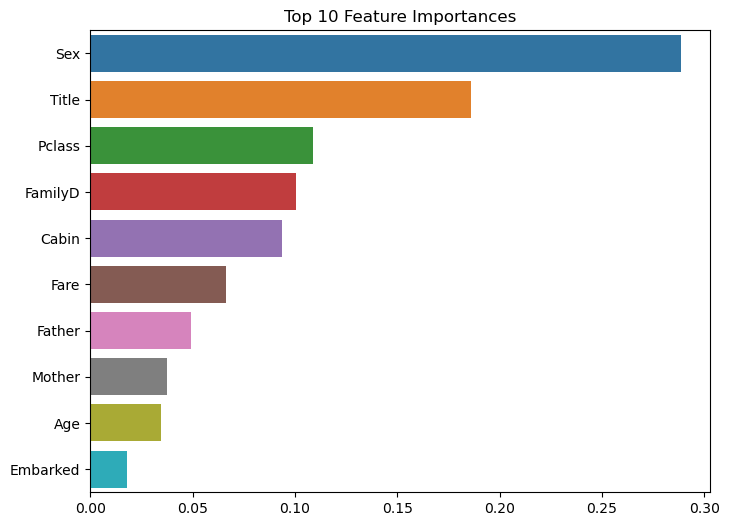

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

clf = RandomForestClassifier(n_estimators=50,max_depth=4,max_features=2,min_samples_leaf=3,min_samples_split=2)
clf.fit(x_train,y_train)
ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()